In [1]:
%pip install torch 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\wmm\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\wmm\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import torch
from torch import nn

In [4]:
import math
import matplotlib.pyplot as plt

In [5]:
torch.manual_seed(111)

In [6]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

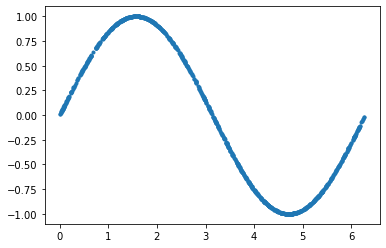

In [7]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [8]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,1),
            nn.Sigmoid(),
        )
    def forward(self,x):
        output = self.model(x)
        return output

In [10]:
discriminator = Discriminator()

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,2),
        )
    
    def forward(self, x):
      output = self.model(x)
      return output

In [12]:
generator = Generator()

In [13]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [14]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.21308740973472595
Epoch: 0 Loss G.: 1.7989580631256104


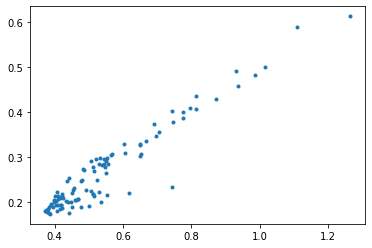

Epoch: 10 Loss D.: 0.6445375680923462
Epoch: 10 Loss G.: 0.7684937715530396


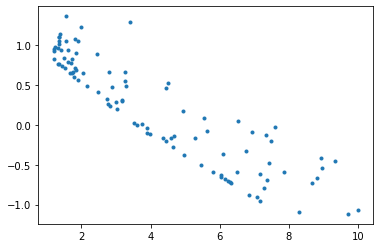

Epoch: 20 Loss D.: 0.6332279443740845
Epoch: 20 Loss G.: 0.8172334432601929


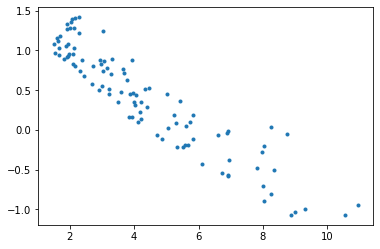

Epoch: 30 Loss D.: 0.5916838645935059
Epoch: 30 Loss G.: 0.9623961448669434


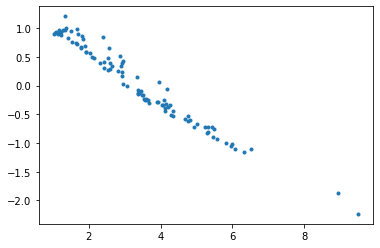

Epoch: 40 Loss D.: 0.6189943552017212
Epoch: 40 Loss G.: 0.8522682189941406


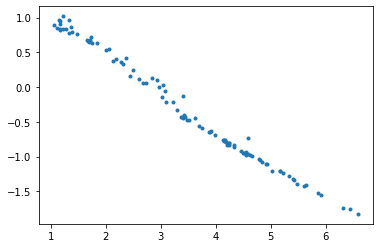

Epoch: 50 Loss D.: 0.6205280423164368
Epoch: 50 Loss G.: 0.9688757658004761


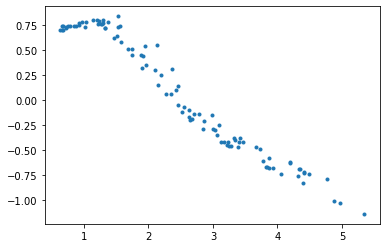

Epoch: 60 Loss D.: 0.7023873329162598
Epoch: 60 Loss G.: 0.7572841048240662


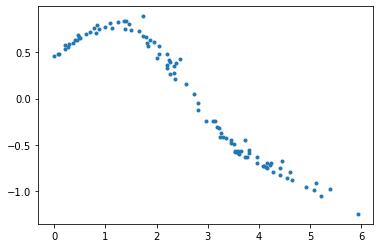

Epoch: 70 Loss D.: 0.7341042757034302
Epoch: 70 Loss G.: 0.8113086819648743


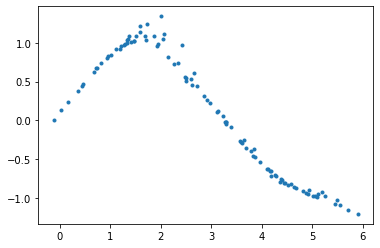

Epoch: 80 Loss D.: 0.6753482818603516
Epoch: 80 Loss G.: 0.822579026222229


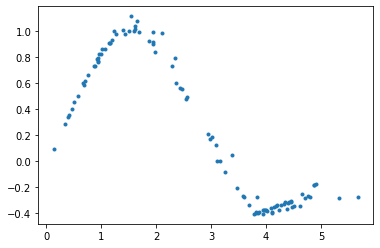

Epoch: 90 Loss D.: 0.6991428136825562
Epoch: 90 Loss G.: 0.6697553396224976


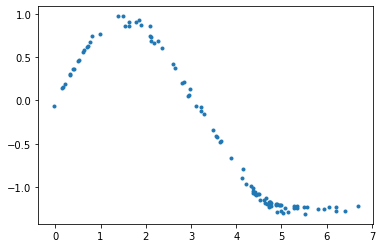

Epoch: 100 Loss D.: 0.7019839882850647
Epoch: 100 Loss G.: 0.7649763226509094


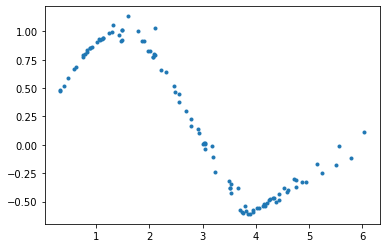

Epoch: 110 Loss D.: 0.708747386932373
Epoch: 110 Loss G.: 0.6890391111373901


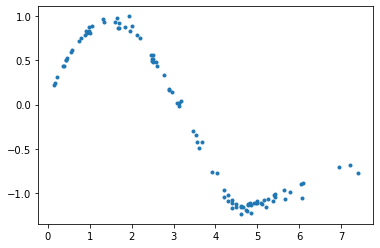

Epoch: 120 Loss D.: 0.7023547887802124
Epoch: 120 Loss G.: 0.6941639184951782


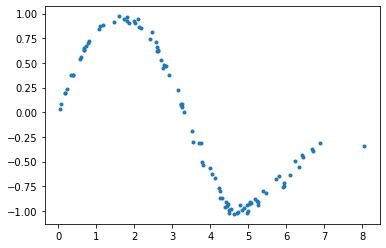

Epoch: 130 Loss D.: 0.6750691533088684
Epoch: 130 Loss G.: 0.7134358882904053


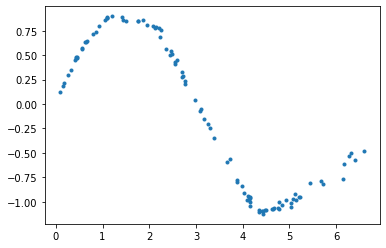

Epoch: 140 Loss D.: 0.6849307417869568
Epoch: 140 Loss G.: 0.7032004594802856


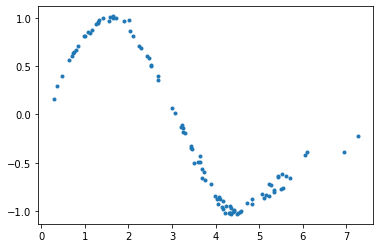

Epoch: 150 Loss D.: 0.6795501112937927
Epoch: 150 Loss G.: 0.9138376116752625


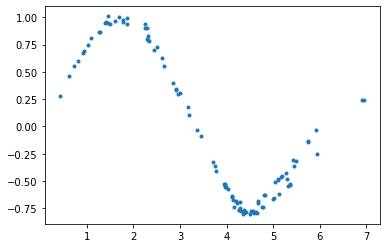

Epoch: 160 Loss D.: 0.6574957966804504
Epoch: 160 Loss G.: 0.7259189486503601


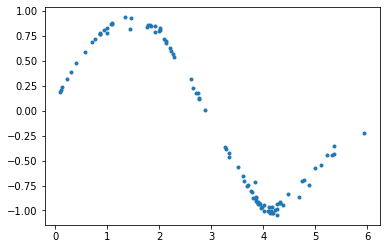

Epoch: 170 Loss D.: 0.6757292151451111
Epoch: 170 Loss G.: 0.7643138766288757


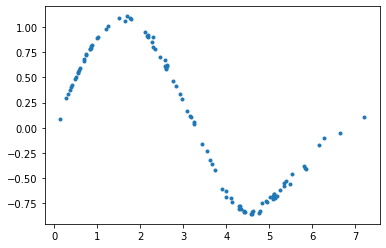

Epoch: 180 Loss D.: 0.6517140865325928
Epoch: 180 Loss G.: 0.7287245988845825


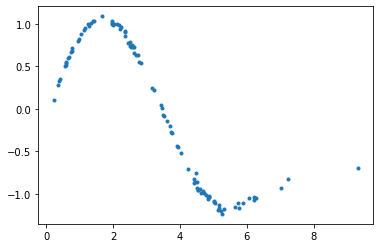

Epoch: 190 Loss D.: 0.6591134667396545
Epoch: 190 Loss G.: 0.7309284210205078


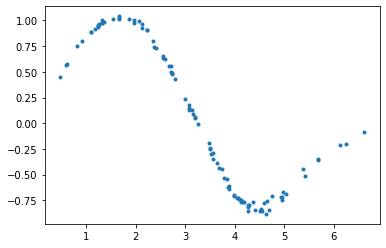

Epoch: 200 Loss D.: 0.6239667534828186
Epoch: 200 Loss G.: 0.7745416760444641


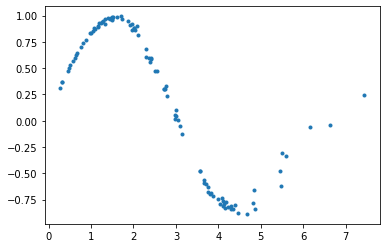

Epoch: 210 Loss D.: 0.6622887849807739
Epoch: 210 Loss G.: 0.7208173274993896


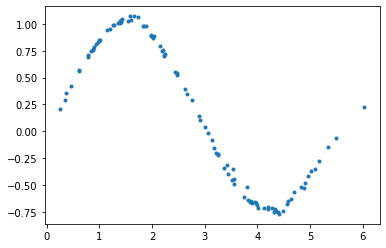

Epoch: 220 Loss D.: 0.6589815020561218
Epoch: 220 Loss G.: 0.7168530225753784


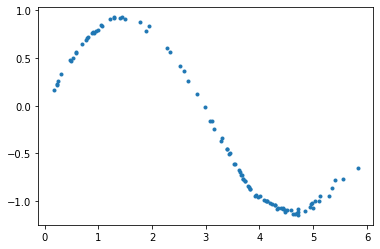

Epoch: 230 Loss D.: 0.6750965714454651
Epoch: 230 Loss G.: 0.7873927354812622


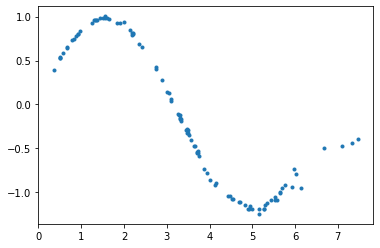

Epoch: 240 Loss D.: 0.662649393081665
Epoch: 240 Loss G.: 0.6111035346984863


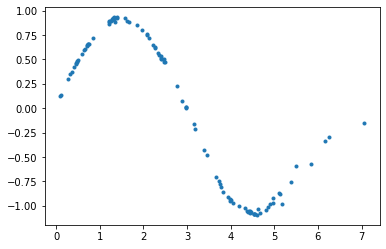

Epoch: 250 Loss D.: 0.7463699579238892
Epoch: 250 Loss G.: 0.6583051085472107


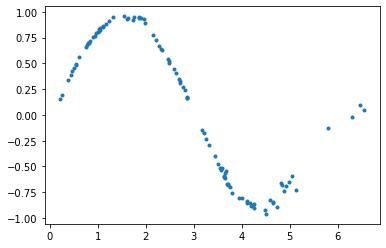

Epoch: 260 Loss D.: 0.6370410323143005
Epoch: 260 Loss G.: 0.8077186346054077


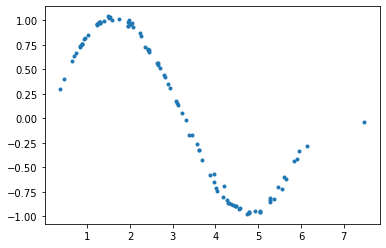

Epoch: 270 Loss D.: 0.7202864289283752
Epoch: 270 Loss G.: 0.6731545925140381


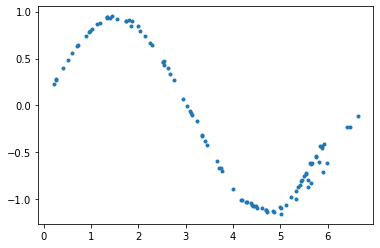

Epoch: 280 Loss D.: 0.6923621296882629
Epoch: 280 Loss G.: 0.7381080389022827


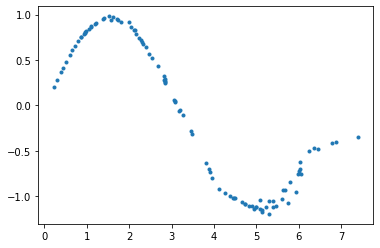

Epoch: 290 Loss D.: 0.6967238783836365
Epoch: 290 Loss G.: 0.773184061050415


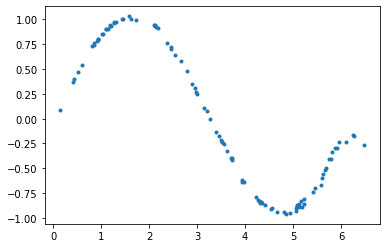

In [15]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
            plt.show()

In [16]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

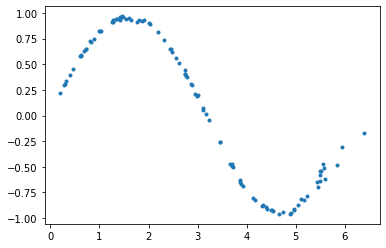

In [17]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")